# 단순 선형 회귀

## 1. 모델 생성

주행속도와 제동거리 간의 선형 회귀 모델 추정

> dist = -17.579 + 3.932 x speed

In [1]:
m <- lm(dist ~ speed, cars)
m


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


<br>

**회귀계수** 
> coef(model)

In [3]:
coef(m)

(Intercept)       speed 
 -17.579095    3.932409

<br>
<br>

## 2. 선형 회귀 결과

**적합된 값**: 모델에 의해 예측된 값
> fitted(model)

In [2]:
fitted(m)[1:4]

1         2         3         4 
-1.849460 -1.849460  9.947766  9.947766

<br>

**잔차** : 모델로부터 구한 예측값과 실제 값 사이의 차이
> residuals(model)

In [4]:
residuals(m)[1:4]

1         2         3         4 
 3.849460 11.849460 -5.947766 12.052234

<br>

**회귀계수의 신뢰구간**: t 분포를 사용한 신뢰구간
> confint(model)

In [5]:
confint(m)

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


In [6]:
deviance(m)

[1] 11353.52

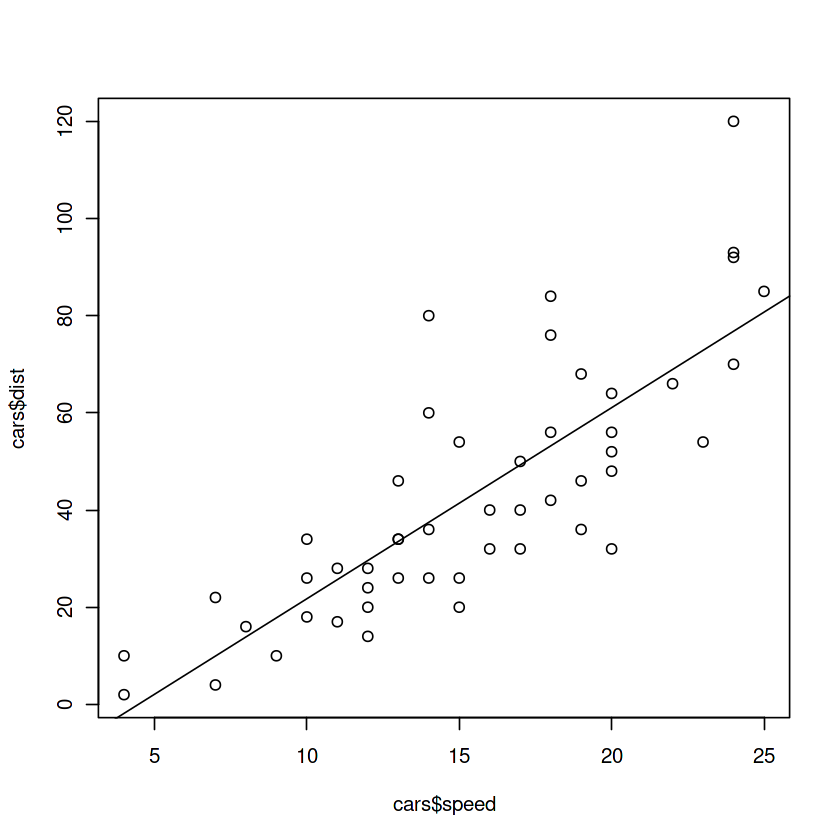

In [7]:
plot(cars$speed, cars$dist)
abline(coef(m))

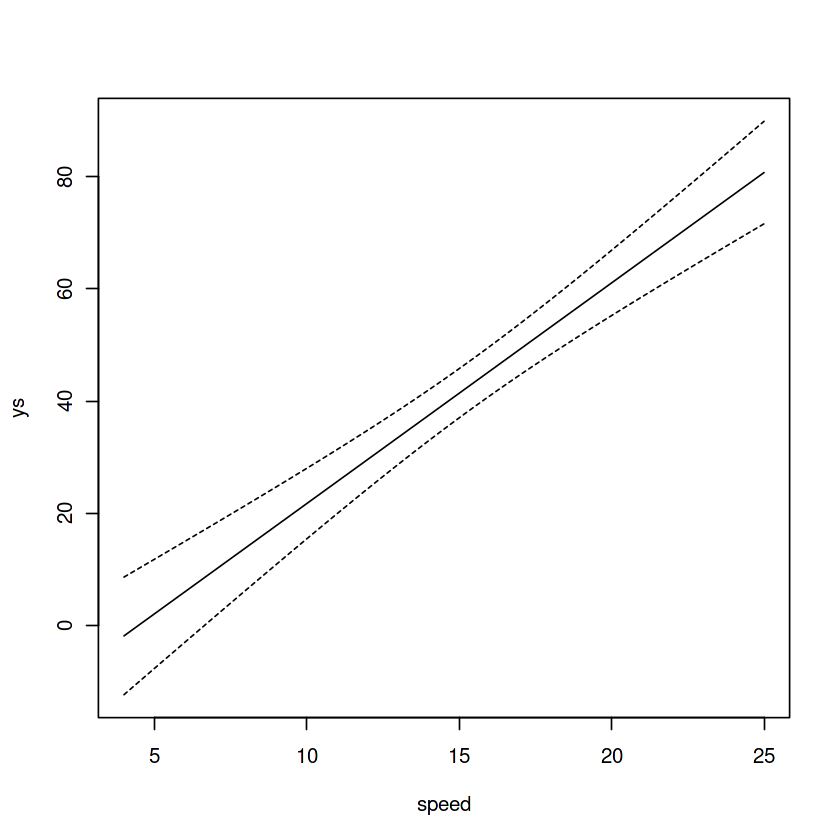

In [8]:
speed <- seq(min(cars$speed), max(cars$speed), .1)
ys <- predict(m, newdata=data.frame(speed=speed), interval="confidence")

# 선형회귀식
matplot(speed, ys, type='n')

# 신뢰구간
matlines(speed, ys, lty=c(1, 2, 2), col=1)

<br>
<br>

## 3. 분산분석 ANOVA (Analysis of Variance)

In [10]:
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
speed,1,21185.46,21185.4589,89.56711,1.489836e-12
Residuals,48,11353.52,236.5317,NA,NA


<br>
<br>

## 4. 완전 모델과 축소 모델 비교

- full: 설명 변수 speed로 dist를 예측
- reduced: 설명 변수 speed를 제외하고 dist를 상수값으로 예측

<br>

> F 통계량 = 89.567, p-value = 1.49e-12 ***<br><br>
> ▶ reduced 모델과 full 모델 간에는 유의한 차이가 있다<br>
> ▶ speed 열이 유의미한 변수이다

In [11]:
full <- lm(dist ~ speed, data=cars)
full


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


In [12]:
reduced <- lm(dist ~ 1, data=cars)
reduced


Call:
lm(formula = dist ~ 1, data = cars)

Coefficients:
(Intercept)  
      42.98  


In [13]:
anova(reduced, full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,49,32538.98,NA,NA,NA,NA
2,48,11353.52,1,21185.46,89.56711,1.489836e-12


<br>
<br>

## 5. 회귀 모델 성능 평가


> Residuals

실제 데이터에서 관측된 잔차<br><br>

> Coefficients

모델의 계수와 계수들의 통계적 유의성<br><br>

> Multiple R-squared과 Adjusted R-squared

모델이 데이터의 분산을 얼마나 설명하는지<br><br>

> F-statistic

모델이 통계적으로 얼마나 의미가 있는지

In [14]:
summary(m)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


<br>
<br>

## 6. 예측

자동자 주행속도와 제동거리에 대한 선형 회귀모델을 사용해 주행속도가 3인 경우의 제동거리 예측해보기

In [15]:
m <- lm(dist ~ speed, cars)
predict(m, newdata=data.frame(speed=3))

1 
-5.781869

In [16]:
coef(m)

(Intercept)       speed 
 -17.579095    3.932409

<br>

### 6-1. 평균값 예측과 신뢰구간

특정 속도를 가진 평균적인 차량의 제동 거리

In [17]:
predict(m, newdata=data.frame(speed=3), interval="confidence")

,fit,lwr,upr
1,-5.781869,-17.02659,5.462853


<br>

### 6-2. 개별값 예측과 예측구간

특정 속도를 가진 차량 한대의 제동거리

In [18]:
predict(m, newdata=data.frame(speed=3), interval="prediction")

,fit,lwr,upr
1,-5.781869,-38.68565,27.12192
